In [2]:
import pandas as pd
import sqlite3
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn import cluster
import sklearn.metrics

In [3]:
def cle_test(df,cols):
    for i in cols:
        if df.size == df.drop_duplicates(cols).size:
            print('la clé est unique')
        else:
            print('la clé n\'est pas unique')

In [4]:
# Connexion à la base de données SQLite
conn = sqlite3.connect('olist.db')

# Requête SQL pour récupérer toutes les données de la table souhaitée (par exemple, "ma_table")
query1 = "SELECT * FROM customers;"
query2 = "SELECT * FROM geoloc;"
query3 = "SELECT * FROM order_items;"
query4 = "SELECT * FROM order_pymts;"
query5 = "SELECT * FROM order_reviews;"
query6 = "SELECT * FROM orders;"
query7 = "SELECT * FROM products;"
query8 = "SELECT * FROM sellers;"
query9 = "SELECT * FROM translation;"



# Utilisation de Pandas pour lire les données depuis la base de données
customers = pd.read_sql(query1, conn)
geoloc = pd.read_sql(query2, conn)
order_items = pd.read_sql(query3, conn)
order_pymts = pd.read_sql(query4, conn)
order_reviews = pd.read_sql(query5, conn)
orders = pd.read_sql(query6, conn)
products = pd.read_sql(query7, conn)
sellers = pd.read_sql(query8, conn)
translation = pd.read_sql(query9, conn)





In [5]:
# Convertir les colonnes de dates en datetime
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])



Empty DataFrame
Columns: [index, order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


In [6]:
# Convertir la colonne order_purchase_timestamp en datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])



Empty DataFrame
Columns: [seller_id, total_products_sold]
Index: []


In [7]:
# Convertir la colonne order_purchase_timestamp en datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])


Empty DataFrame
Columns: [customer_zip_code_prefix, order_id, review_score]
Index: []


# prétraitement

## customers

Ce dataset contient des informations sur le client, son numéro d'identification et son emplacement. Dans le système, chaque commande est attribuée à un identifiant client unique. Cela signifie qu'un même client obtiendra des identifiants différents pour différentes commandes. Le but d'avoir un customer_unique_id sur l'ensemble de données est de permettre d'identifier les clients qui ont effectué des rachats dans le magasin. Sinon, vous constaterez que chaque commande est associée à un client différent

In [8]:
customers.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
customers.shape

(99441, 6)

In [10]:
customers= customers.drop(['index'], axis=1)

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers.duplicated().sum()

0

In [13]:
customers['customer_id'].count()

99441

In [14]:
cle_test(customers,['customer_id'])

la clé est unique


## geoloc

Ce dataset contient des informations sur les codes postaux brésiliens et ses coordonnées latitude/longitude.

In [15]:
geoloc.head()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


In [16]:
geoloc.shape

(1000163, 6)

In [17]:
geoloc = geoloc.drop(["index"], axis=1)

In [18]:
geoloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [19]:
geoloc.duplicated().sum()

261831

## order_items

Ce dataset comprend des données sur les articles achetés dans chaque commande.

In [20]:
order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
order_items.shape

(112650, 8)

In [22]:
order_items = order_items.drop(["index"], axis=1)

In [23]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
order_items.duplicated().sum()

0

In [25]:
cle_test(order_items,['order_id'])

la clé n'est pas unique


## order_pymts

Ce dataset comprend des données sur les options de paiement des commandes.

In [26]:
order_pymts.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [27]:
order_pymts.shape

(103886, 6)

In [28]:
order_pymts = order_pymts.drop(["index"], axis=1)

In [29]:
order_pymts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [30]:
order_pymts.duplicated().sum()

0

In [31]:
cle_test(order_pymts,['order_id'])

la clé n'est pas unique


## order_reviews

Ce dataset comprend des données sur les avis rédigés par les clients. Une fois qu'un client a acheté le produit dans Olist Store, un vendeur est averti pour exécuter cette commande. Une fois que le client reçoit le produit, ou que la date de livraison estimée est due, le client reçoit une enquête de satisfaction par e-mail où il peut donner une note pour l'expérience d'achat et écrire quelques commentaires.

In [32]:
order_reviews.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [33]:
order_reviews.shape

(99224, 8)

In [34]:
order_reviews= order_reviews.drop(["index"], axis=1)

In [35]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [36]:
order_reviews.duplicated().sum()

0

In [37]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [38]:
cle_test(order_reviews,['review_id'])

la clé n'est pas unique


## orders

Il s'agit du dataset de base. Pour chaque commande, on retrouve l'identifiant client ainsi que les différentes dates d'étapes de la commande.

In [39]:
orders.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [40]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [41]:
orders.shape

(99441, 9)

In [42]:
orders = orders.drop(["index"], axis=1)

In [43]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


In [44]:
orders.duplicated().sum()

0

In [45]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [46]:
cle_test(orders,['order_id'])

la clé est unique


## products

Ce dataset comprend des données sur les produits vendus par Olist.

In [47]:
products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [48]:
products.shape

(32951, 10)

In [49]:
products = products.drop(["index"], axis=1)

In [50]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [51]:
products.duplicated().sum()

0

In [52]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [53]:
cle_test(products,['product_id'])

la clé est unique


## sellers

Ce dataset comprend des données sur les vendeurs qui ont exécuté les commandes passées chez Olist. Il permet de connaître l'emplacement du vendeur et d'identifier quel vendeur a fourni chaque produit.

In [54]:
sellers.head()

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [55]:
sellers.shape

(3095, 5)

In [56]:
sellers = sellers.drop(["index"], axis=1)

In [57]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [58]:
sellers.duplicated().sum()

0

In [59]:
cle_test(sellers,['seller_id'])

la clé est unique


## translation

Ce dataset traduit le nom de la catégorie de produit en anglais

In [60]:
translation.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [61]:
translation.shape

(71, 3)

In [62]:
translation =translation.drop(["index"], axis=1)

In [63]:
translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [64]:
translation.duplicated().sum()

0

In [65]:
cle_test(translation,['product_category_name'])

la clé est unique


# Jointure

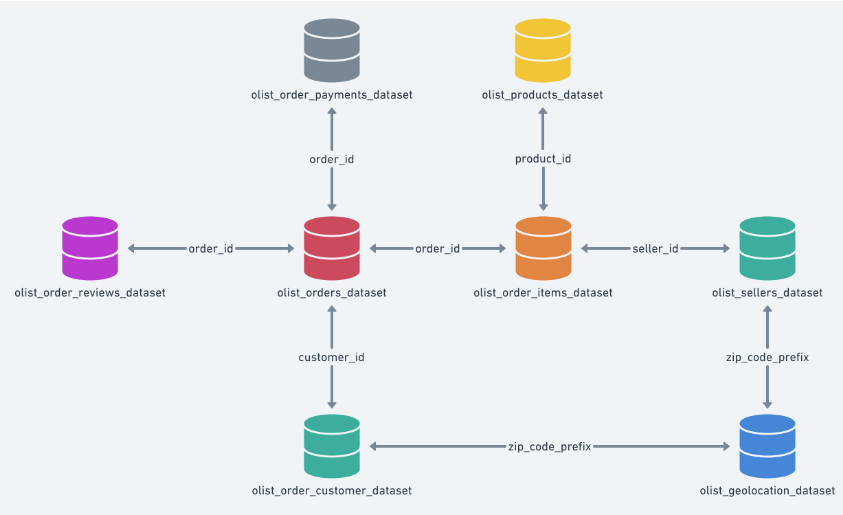

Nous allons donc partir du dataset de base, soit celui nommé order

In [66]:
order_cust= orders.merge(customers, on='customer_id',  how='outer', indicator=True)

In [67]:
order_cust['_merge'].value_counts()

both          99441
left_only         0
right_only        0
Name: _merge, dtype: int64

In [68]:
order_cust = order_cust[order_cust['_merge'] == 'both'].drop("_merge",1)

In [69]:
df1= order_cust.merge(order_reviews, on='order_id',  how='left')

In [70]:
df2= df1.merge(order_items, on='order_id',  how='left')

In [71]:
df3= df2.merge(order_pymts, on='order_id',  how='left')

In [72]:
df4= df3.merge(products, on='product_id',  how='left')

In [73]:
df5= df4.merge(translation, on='product_category_name',  how='left')

In [74]:
df= df5.merge(sellers, on='seller_id',  how='left')

In [75]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP


In [76]:
df.duplicated().sum()

0

In [77]:
df.shape

(119143, 40)

In [78]:
columns_to_drop = ['product_width_cm','product_height_cm','product_weight_g','order_approved_at', 'shipping_limit_date','product_category_name',
                   'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                   'review_comment_title', 'review_comment_message', 'review_creation_date',
                   'review_answer_timestamp','order_delivered_carrier_date', 'order_delivered_customer_date','shipping_limit_date']

df= df.drop(columns=columns_to_drop)
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,...,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_length_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,...,8.72,1.0,credit_card,1.0,18.12,19.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,...,8.72,3.0,voucher,1.0,2.00,19.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,...,8.72,2.0,voucher,1.0,18.59,19.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,...,22.76,1.0,boleto,1.0,141.46,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,...,19.22,1.0,credit_card,3.0,179.12,24.0,auto,14840.0,guariba,SP


In [79]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
review_id                         997
review_score                      997
order_item_id                     833
product_id                        833
seller_id                         833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_length_cm                 853
product_category_name_english    2567
seller_zip_code_prefix            833
seller_city                       833
seller_state                      833
dtype: int64

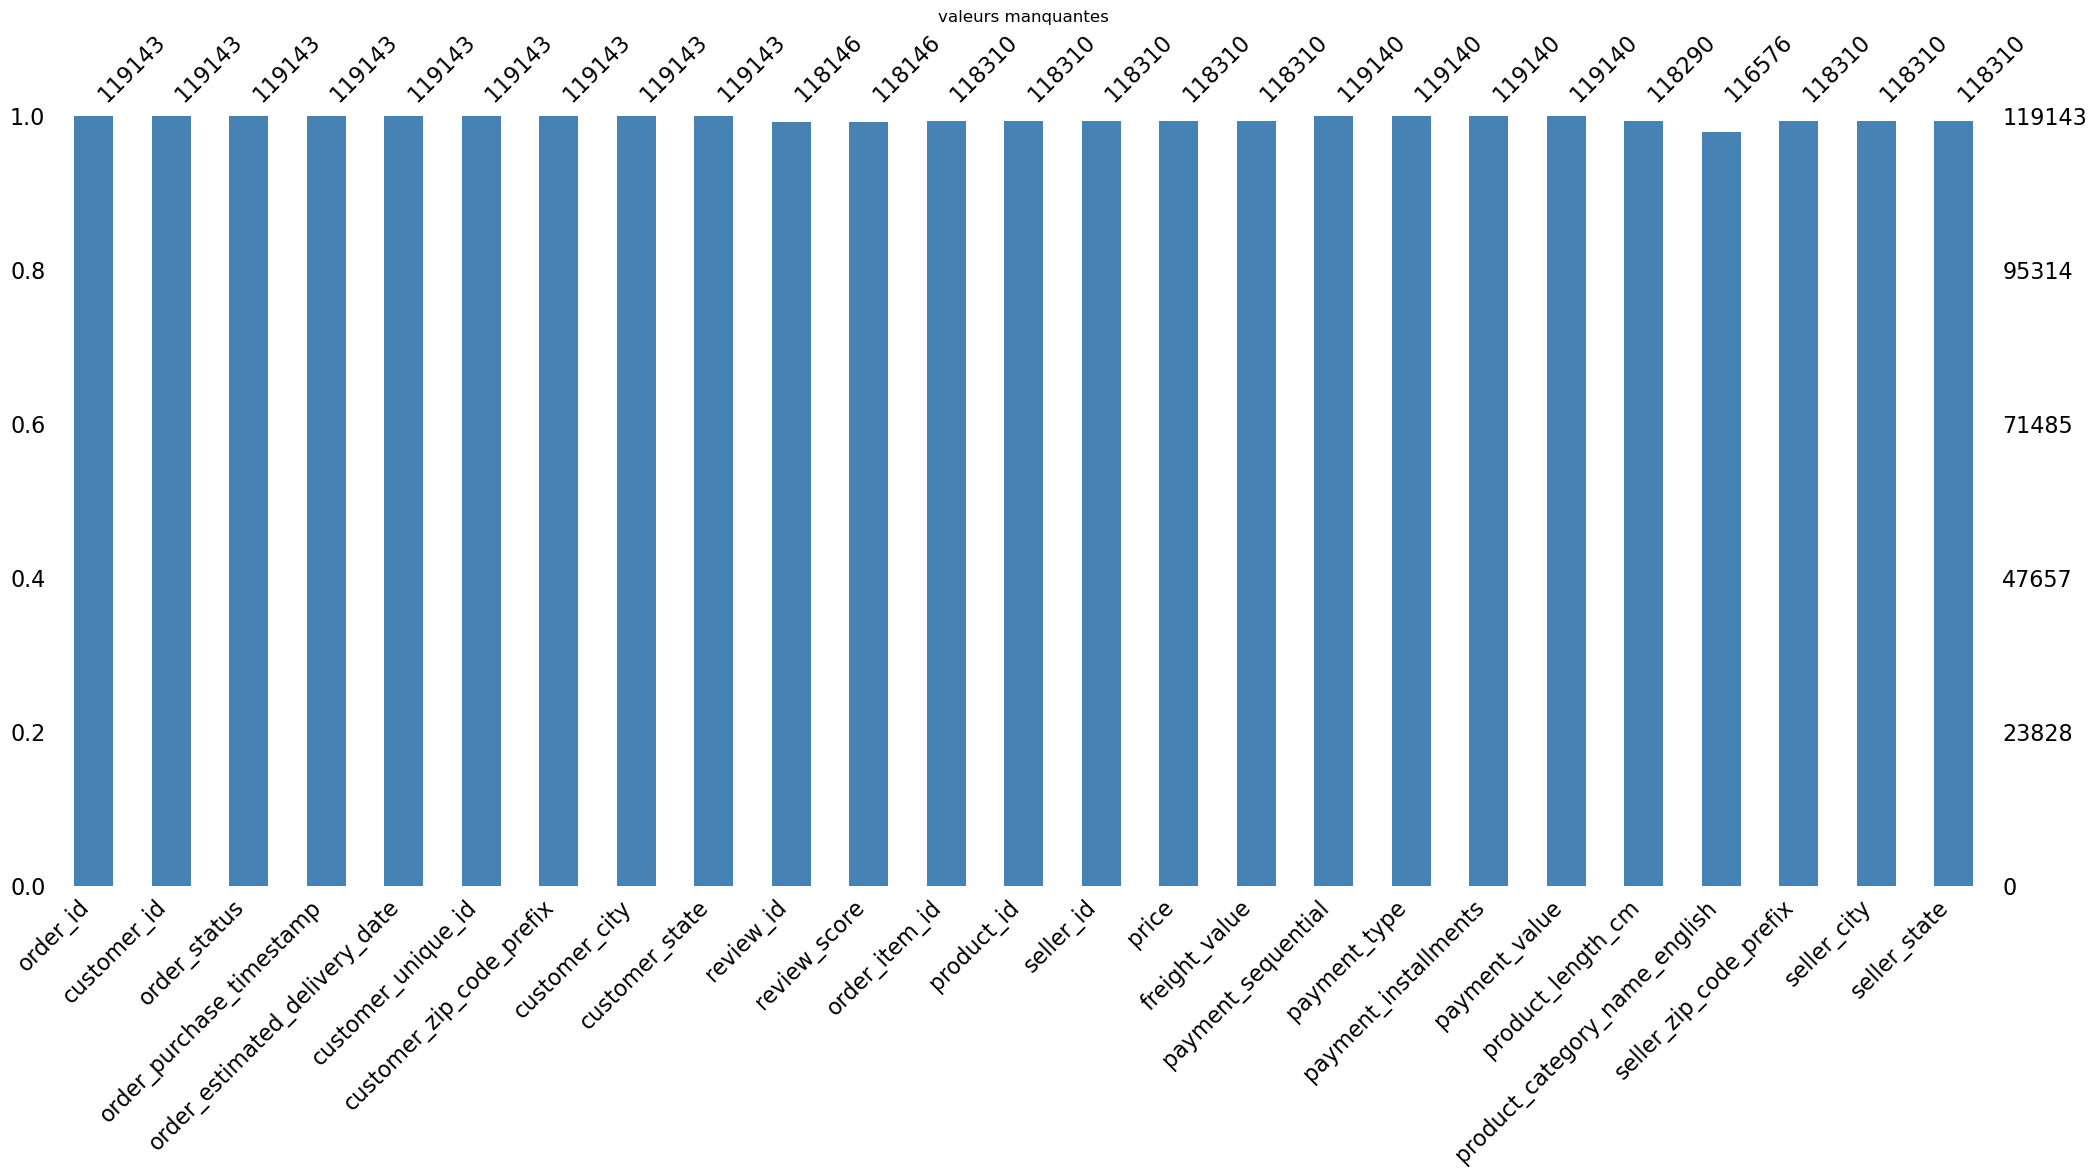

In [80]:
# la fonction msno.bar pour afficher les valeurs manquantes
msno.bar(df, color='steelblue')

plt.title("valeurs manquantes")

plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 5   customer_unique_id             119143 non-null  object        
 6   customer_zip_code_prefix       119143 non-null  int64         
 7   customer_city                  119143 non-null  object        
 8   customer_state                 119143 non-null  object        
 9   review_id                      118146 non-null  object        
 10  review_score                   118146 non-null  float64       
 11  

In [82]:
df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,...,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_length_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
count,119143,119143,119143,119143,119143,119143,119143.000000,119143,119143,118146,...,118310.000000,119140.000000,119140,119140.000000,119140.000000,118290.000000,116576,118310.000000,118310,118310
unique,99441,99441,8,98875,459,96096,NaN,4119,27,98410,...,NaN,NaN,5,NaN,NaN,NaN,71,NaN,611,23
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,eef5dbca8d37dfce6db7d7b16dd0525e,...,NaN,NaN,credit_card,NaN,NaN,NaN,bed_bath_table,NaN,sao paulo,SP
freq,63,63,115723,63,663,75,NaN,18875,50265,63,...,NaN,NaN,87776,NaN,NaN,NaN,11988,NaN,29293,84377
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,35033.451298,NaN,NaN,NaN,...,20.032387,1.094737,NaN,2.941246,172.735135,30.265145,NaN,24442.410413,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,29823.198969,NaN,NaN,NaN,...,15.836850,0.730141,NaN,2.777848,267.776077,16.189367,NaN,27573.004511,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,NaN,...,0.000000,1.000000,NaN,0.000000,0.000000,7.000000,NaN,1001.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,11250.000000,NaN,NaN,NaN,...,13.080000,1.000000,NaN,1.000000,60.850000,18.000000,NaN,6429.000000,NaN,NaN


****************************************************************************************************
Analyse de la colonne customer_zip_code_prefix
****************************************************************************************************
Moyenne : 35033.45
Médiane : 24240.0
Mode : 0    24220
Name: customer_zip_code_prefix, dtype: int64
Variance : 889423196.73
Écart type : 29823.2
Asymétrie : 0.79
Kurtosis : -0.78
Minimum : 1003
25% : 11250.0
50% : 24240.0
75% : 58475.0
Maximum : 99990
la distribution de la colonne customer_zip_code_prefix est symétrique
la distribution de la colonne customer_zip_code_prefix est plus aplatie que la distribution normale


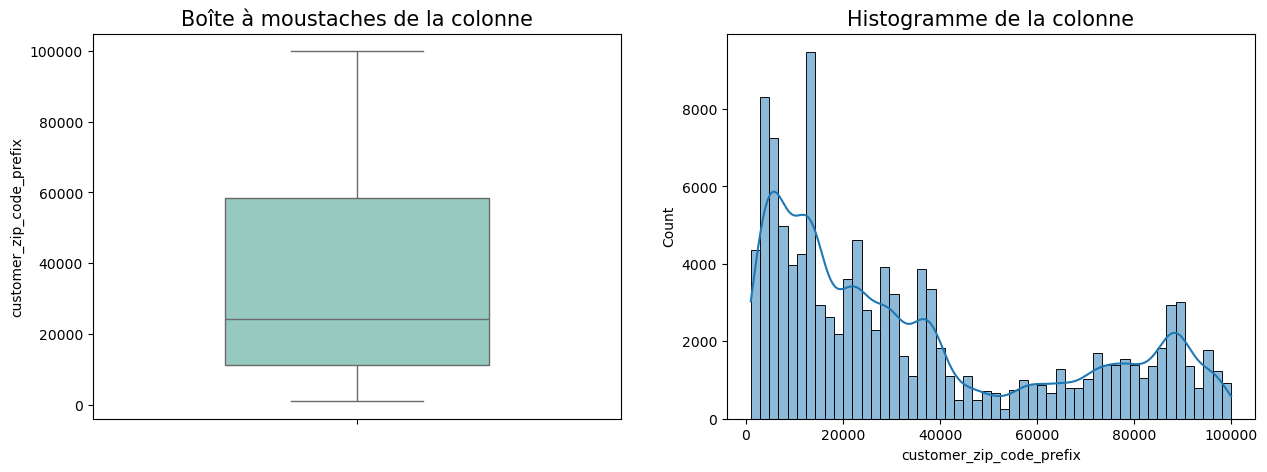

****************************************************************************************************
Analyse de la colonne review_score
****************************************************************************************************
Moyenne : 4.02
Médiane : 5.0
Mode : 0    5.0
Name: review_score, dtype: float64
Variance : 1.96
Écart type : 1.4
Asymétrie : -1.25
Kurtosis : 0.12
Minimum : 1.0
25% : 4.0
50% : 5.0
75% : 5.0
Maximum : 5.0
la distribution de la colonne review_score est étalée à gauche
la distribution de la colonne review_score a le même aplatissement que la distribution normale


<Figure size 640x480 with 0 Axes>

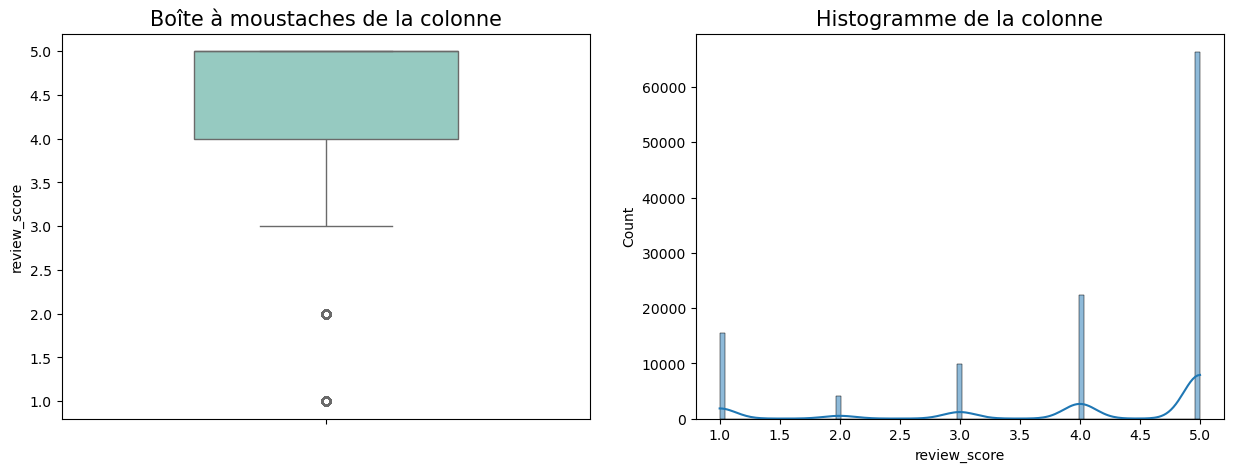

****************************************************************************************************
Analyse de la colonne order_item_id
****************************************************************************************************
Moyenne : 1.2
Médiane : 1.0
Mode : 0    1.0
Name: order_item_id, dtype: float64
Variance : 0.49
Écart type : 0.7
Asymétrie : 7.55
Kurtosis : 103.35
Minimum : 1.0
25% : 1.0
50% : 1.0
75% : 1.0
Maximum : 21.0
la distribution de la colonne order_item_id est étalée à droite
la distribution de la colonne order_item_id est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

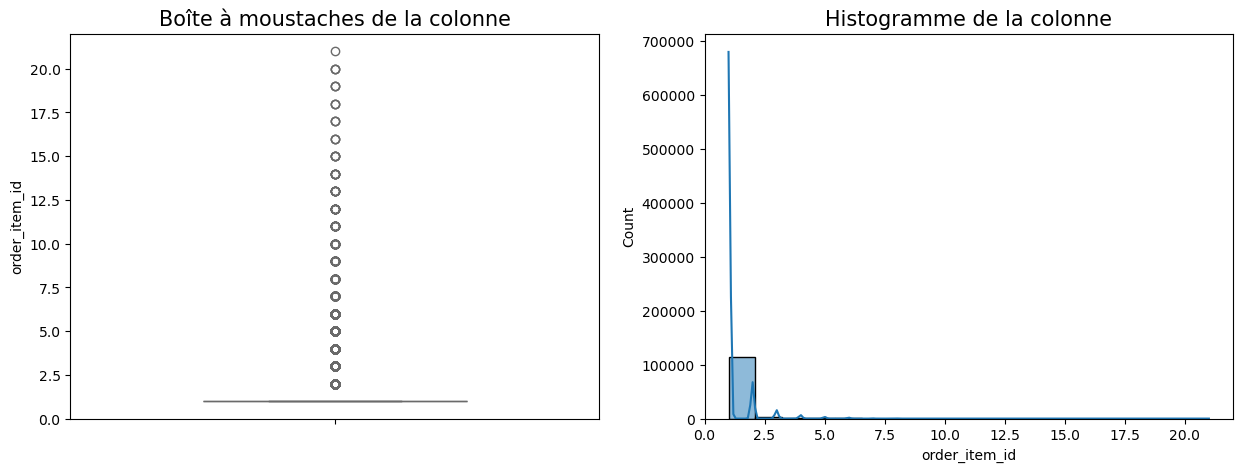

****************************************************************************************************
Analyse de la colonne price
****************************************************************************************************
Moyenne : 120.65
Médiane : 74.9
Mode : 0    59.9
Name: price, dtype: float64
Variance : 33896.38
Écart type : 184.11
Asymétrie : 7.89
Kurtosis : 119.15
Minimum : 0.85
25% : 39.9
50% : 74.9
75% : 134.9
Maximum : 6735.0
la distribution de la colonne price est étalée à droite
la distribution de la colonne price est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

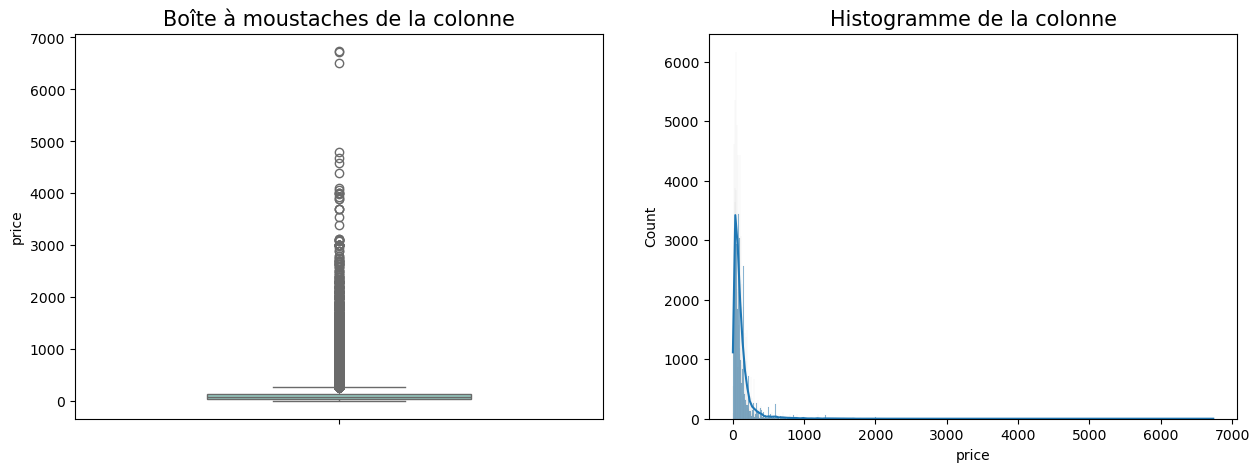

****************************************************************************************************
Analyse de la colonne freight_value
****************************************************************************************************
Moyenne : 20.03
Médiane : 16.28
Mode : 0    15.1
Name: freight_value, dtype: float64
Variance : 250.81
Écart type : 15.84
Asymétrie : 5.54
Kurtosis : 57.64
Minimum : 0.0
25% : 13.08
50% : 16.28
75% : 21.18
Maximum : 409.68
la distribution de la colonne freight_value est étalée à droite
la distribution de la colonne freight_value est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

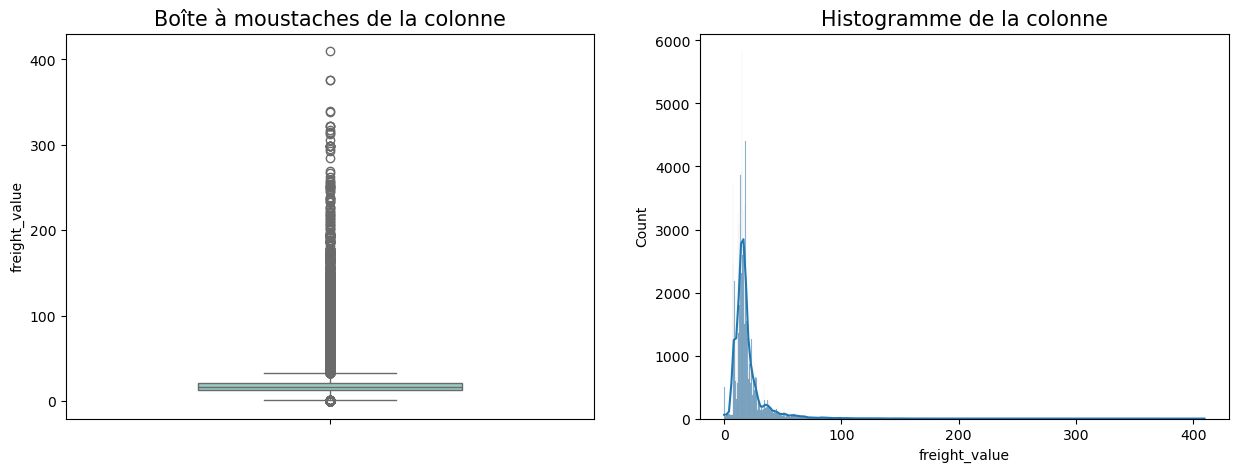

****************************************************************************************************
Analyse de la colonne payment_sequential
****************************************************************************************************
Moyenne : 1.09
Médiane : 1.0
Mode : 0    1.0
Name: payment_sequential, dtype: float64
Variance : 0.53
Écart type : 0.73
Asymétrie : 15.78
Kurtosis : 342.28
Minimum : 1.0
25% : 1.0
50% : 1.0
75% : 1.0
Maximum : 29.0
la distribution de la colonne payment_sequential est étalée à droite
la distribution de la colonne payment_sequential est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

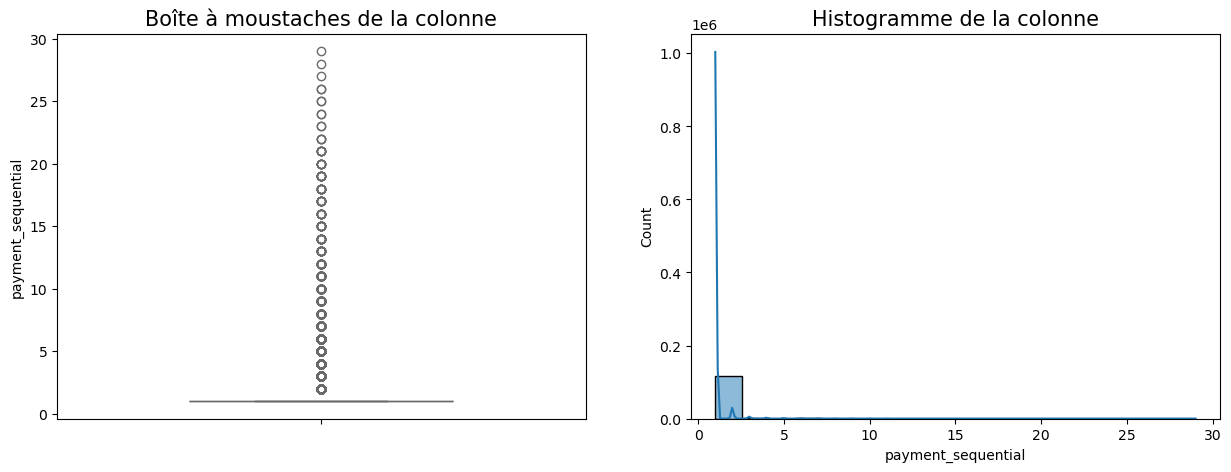

****************************************************************************************************
Analyse de la colonne payment_installments
****************************************************************************************************
Moyenne : 2.94
Médiane : 2.0
Mode : 0    1.0
Name: payment_installments, dtype: float64
Variance : 7.72
Écart type : 2.78
Asymétrie : 1.62
Kurtosis : 2.51
Minimum : 0.0
25% : 1.0
50% : 2.0
75% : 4.0
Maximum : 24.0
la distribution de la colonne payment_installments est étalée à droite
la distribution de la colonne payment_installments est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

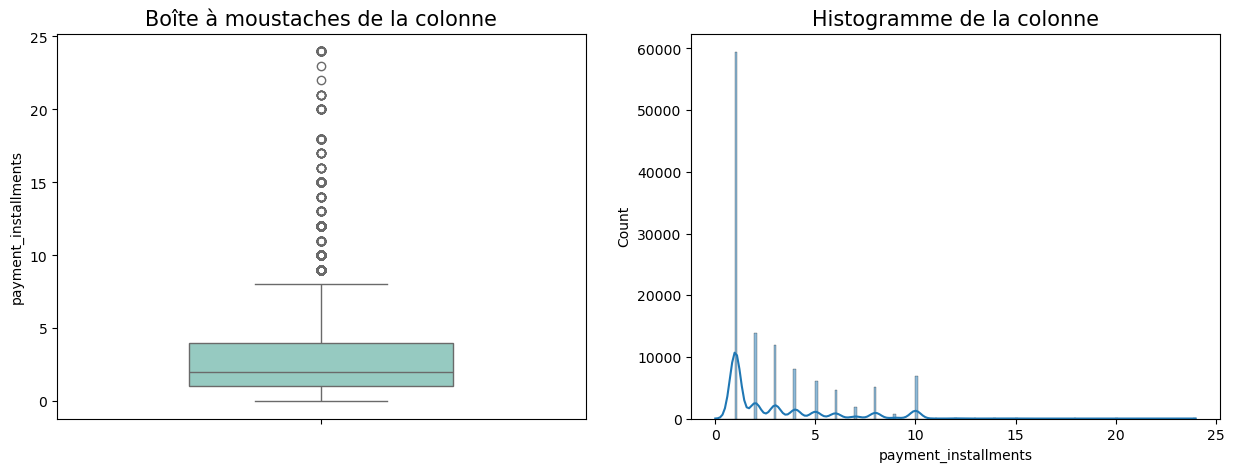

****************************************************************************************************
Analyse de la colonne payment_value
****************************************************************************************************
Moyenne : 172.74
Médiane : 108.16
Mode : 0    50.0
Name: payment_value, dtype: float64
Variance : 71704.03
Écart type : 267.78
Asymétrie : 13.97
Kurtosis : 500.36
Minimum : 0.0
25% : 60.85
50% : 108.16
75% : 189.24
Maximum : 13664.08
la distribution de la colonne payment_value est étalée à droite
la distribution de la colonne payment_value est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

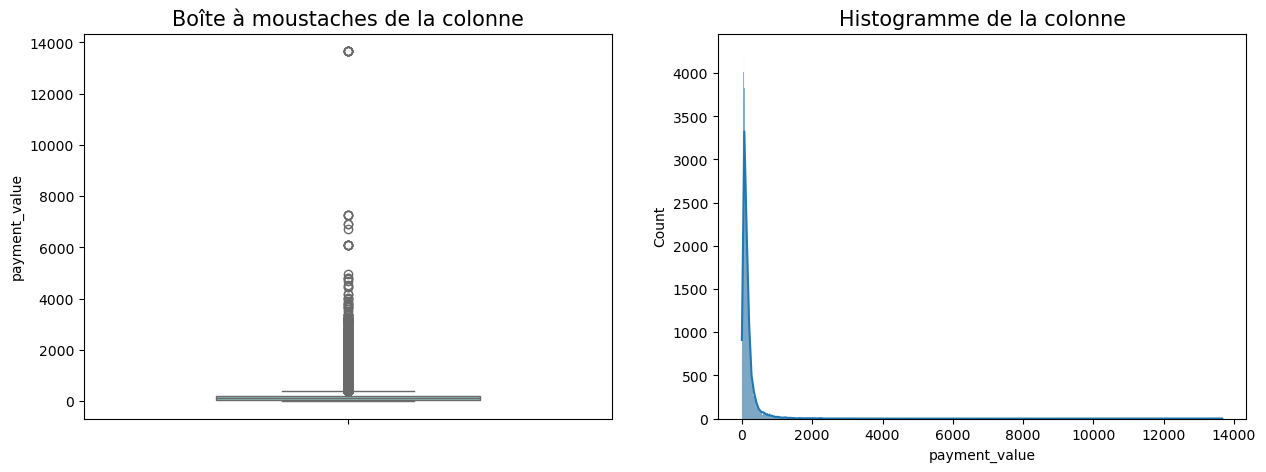

****************************************************************************************************
Analyse de la colonne product_length_cm
****************************************************************************************************
Moyenne : 30.27
Médiane : 25.0
Mode : 0    16.0
Name: product_length_cm, dtype: float64
Variance : 262.1
Écart type : 16.19
Asymétrie : 1.75
Kurtosis : 3.68
Minimum : 7.0
25% : 18.0
50% : 25.0
75% : 38.0
Maximum : 105.0
la distribution de la colonne product_length_cm est étalée à droite
la distribution de la colonne product_length_cm est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

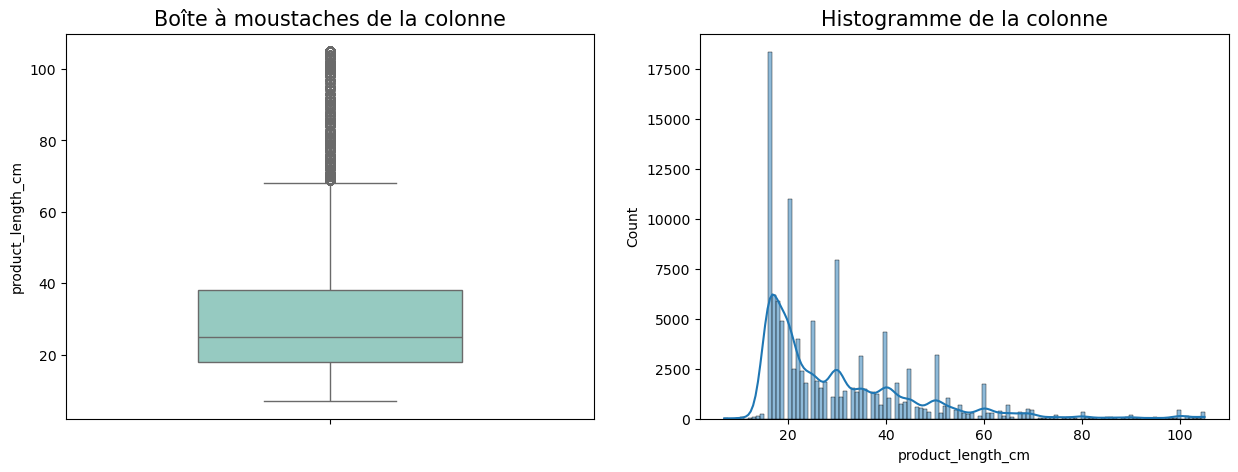

****************************************************************************************************
Analyse de la colonne seller_zip_code_prefix
****************************************************************************************************
Moyenne : 24442.41
Médiane : 13660.0
Mode : 0    14940.0
Name: seller_zip_code_prefix, dtype: float64
Variance : 760270577.75
Écart type : 27573.0
Asymétrie : 1.56
Kurtosis : 0.94
Minimum : 1001.0
25% : 6429.0
50% : 13660.0
75% : 27972.0
Maximum : 99730.0
la distribution de la colonne seller_zip_code_prefix est étalée à droite
la distribution de la colonne seller_zip_code_prefix a le même aplatissement que la distribution normale


<Figure size 640x480 with 0 Axes>

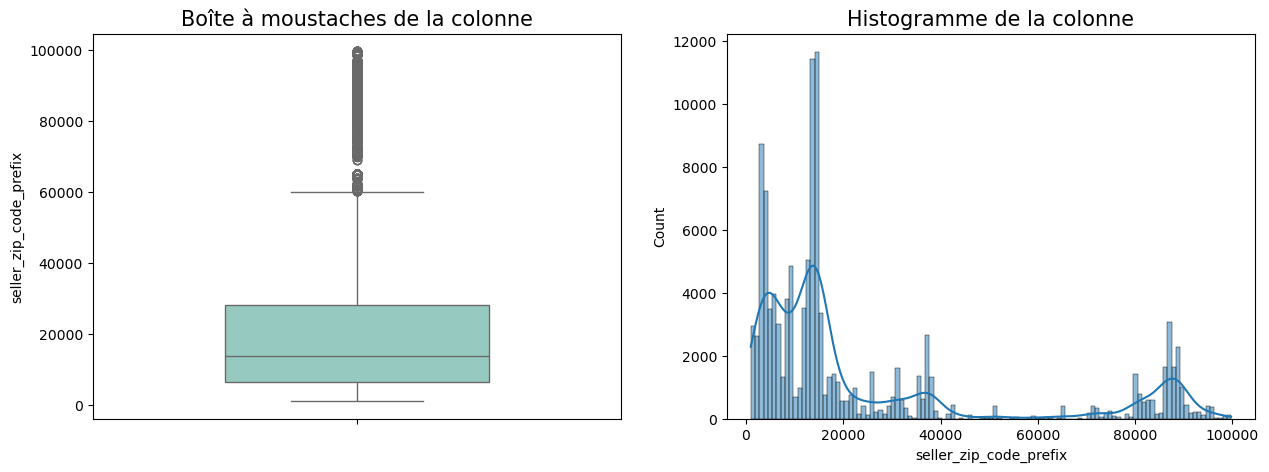

<Figure size 640x480 with 0 Axes>

In [83]:
#analyse univariée

colonnes_numeriques = df.select_dtypes(include=[np.number]).columns.tolist()

color_palette = 'Set3'

for colonne in colonnes_numeriques:
    print('**' * 50)
    print('Analyse de la colonne', colonne)
    print('**' * 50)

    print('Moyenne :', round(df[colonne].mean(), 2))
    print('Médiane :', round(df[colonne].median(), 2))
    print('Mode :', round(df[colonne].mode(), 2))
    print('Variance :', round(df[colonne].var(), 2))
    print('Écart type :', round(df[colonne].std(), 2))
    print('Asymétrie :', round(df[colonne].skew(), 2))
    print('Kurtosis :', round(df[colonne].kurtosis(), 2))
    print('Minimum :', round(df[colonne].min(), 2))
    print('25% :', round(df[colonne].quantile(0.25), 2))
    print('50% :', round(df[colonne].quantile(0.5), 2))
    print('75% :', round(df[colonne].quantile(0.75), 2))
    print('Maximum :', round(df[colonne].max(), 2))

    if np.floor(df[colonne].skew()) == 0:
        print('la distribution de la colonne ' + colonne + ' est symétrique')
    elif round(df[colonne].skew(), 2) > 0:
        print('la distribution de la colonne ' + colonne + ' est étalée à droite')
    else:
        print('la distribution de la colonne ' + colonne + ' est étalée à gauche')

    if np.floor(df[colonne].kurtosis()) == 0:
        print('la distribution de la colonne ' + colonne + ' a le même aplatissement que la distribution normale')
    elif round(df[colonne].kurtosis(), 2) > 0:
        print('la distribution de la colonne ' + colonne + ' est moins aplatie que la distribution normale')
    else:
        print('la distribution de la colonne ' + colonne + ' est plus aplatie que la distribution normale')

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(df[colonne], width=0.5, palette=color_palette)
    plt.title('Boîte à moustaches de la colonne', fontsize=15)
    plt.subplot(1, 2, 2)
    sns.histplot(df[colonne], kde=True, palette=color_palette)
    plt.title('Histogramme de la colonne', fontsize=15)
    plt.show()
    plt.tight_layout()

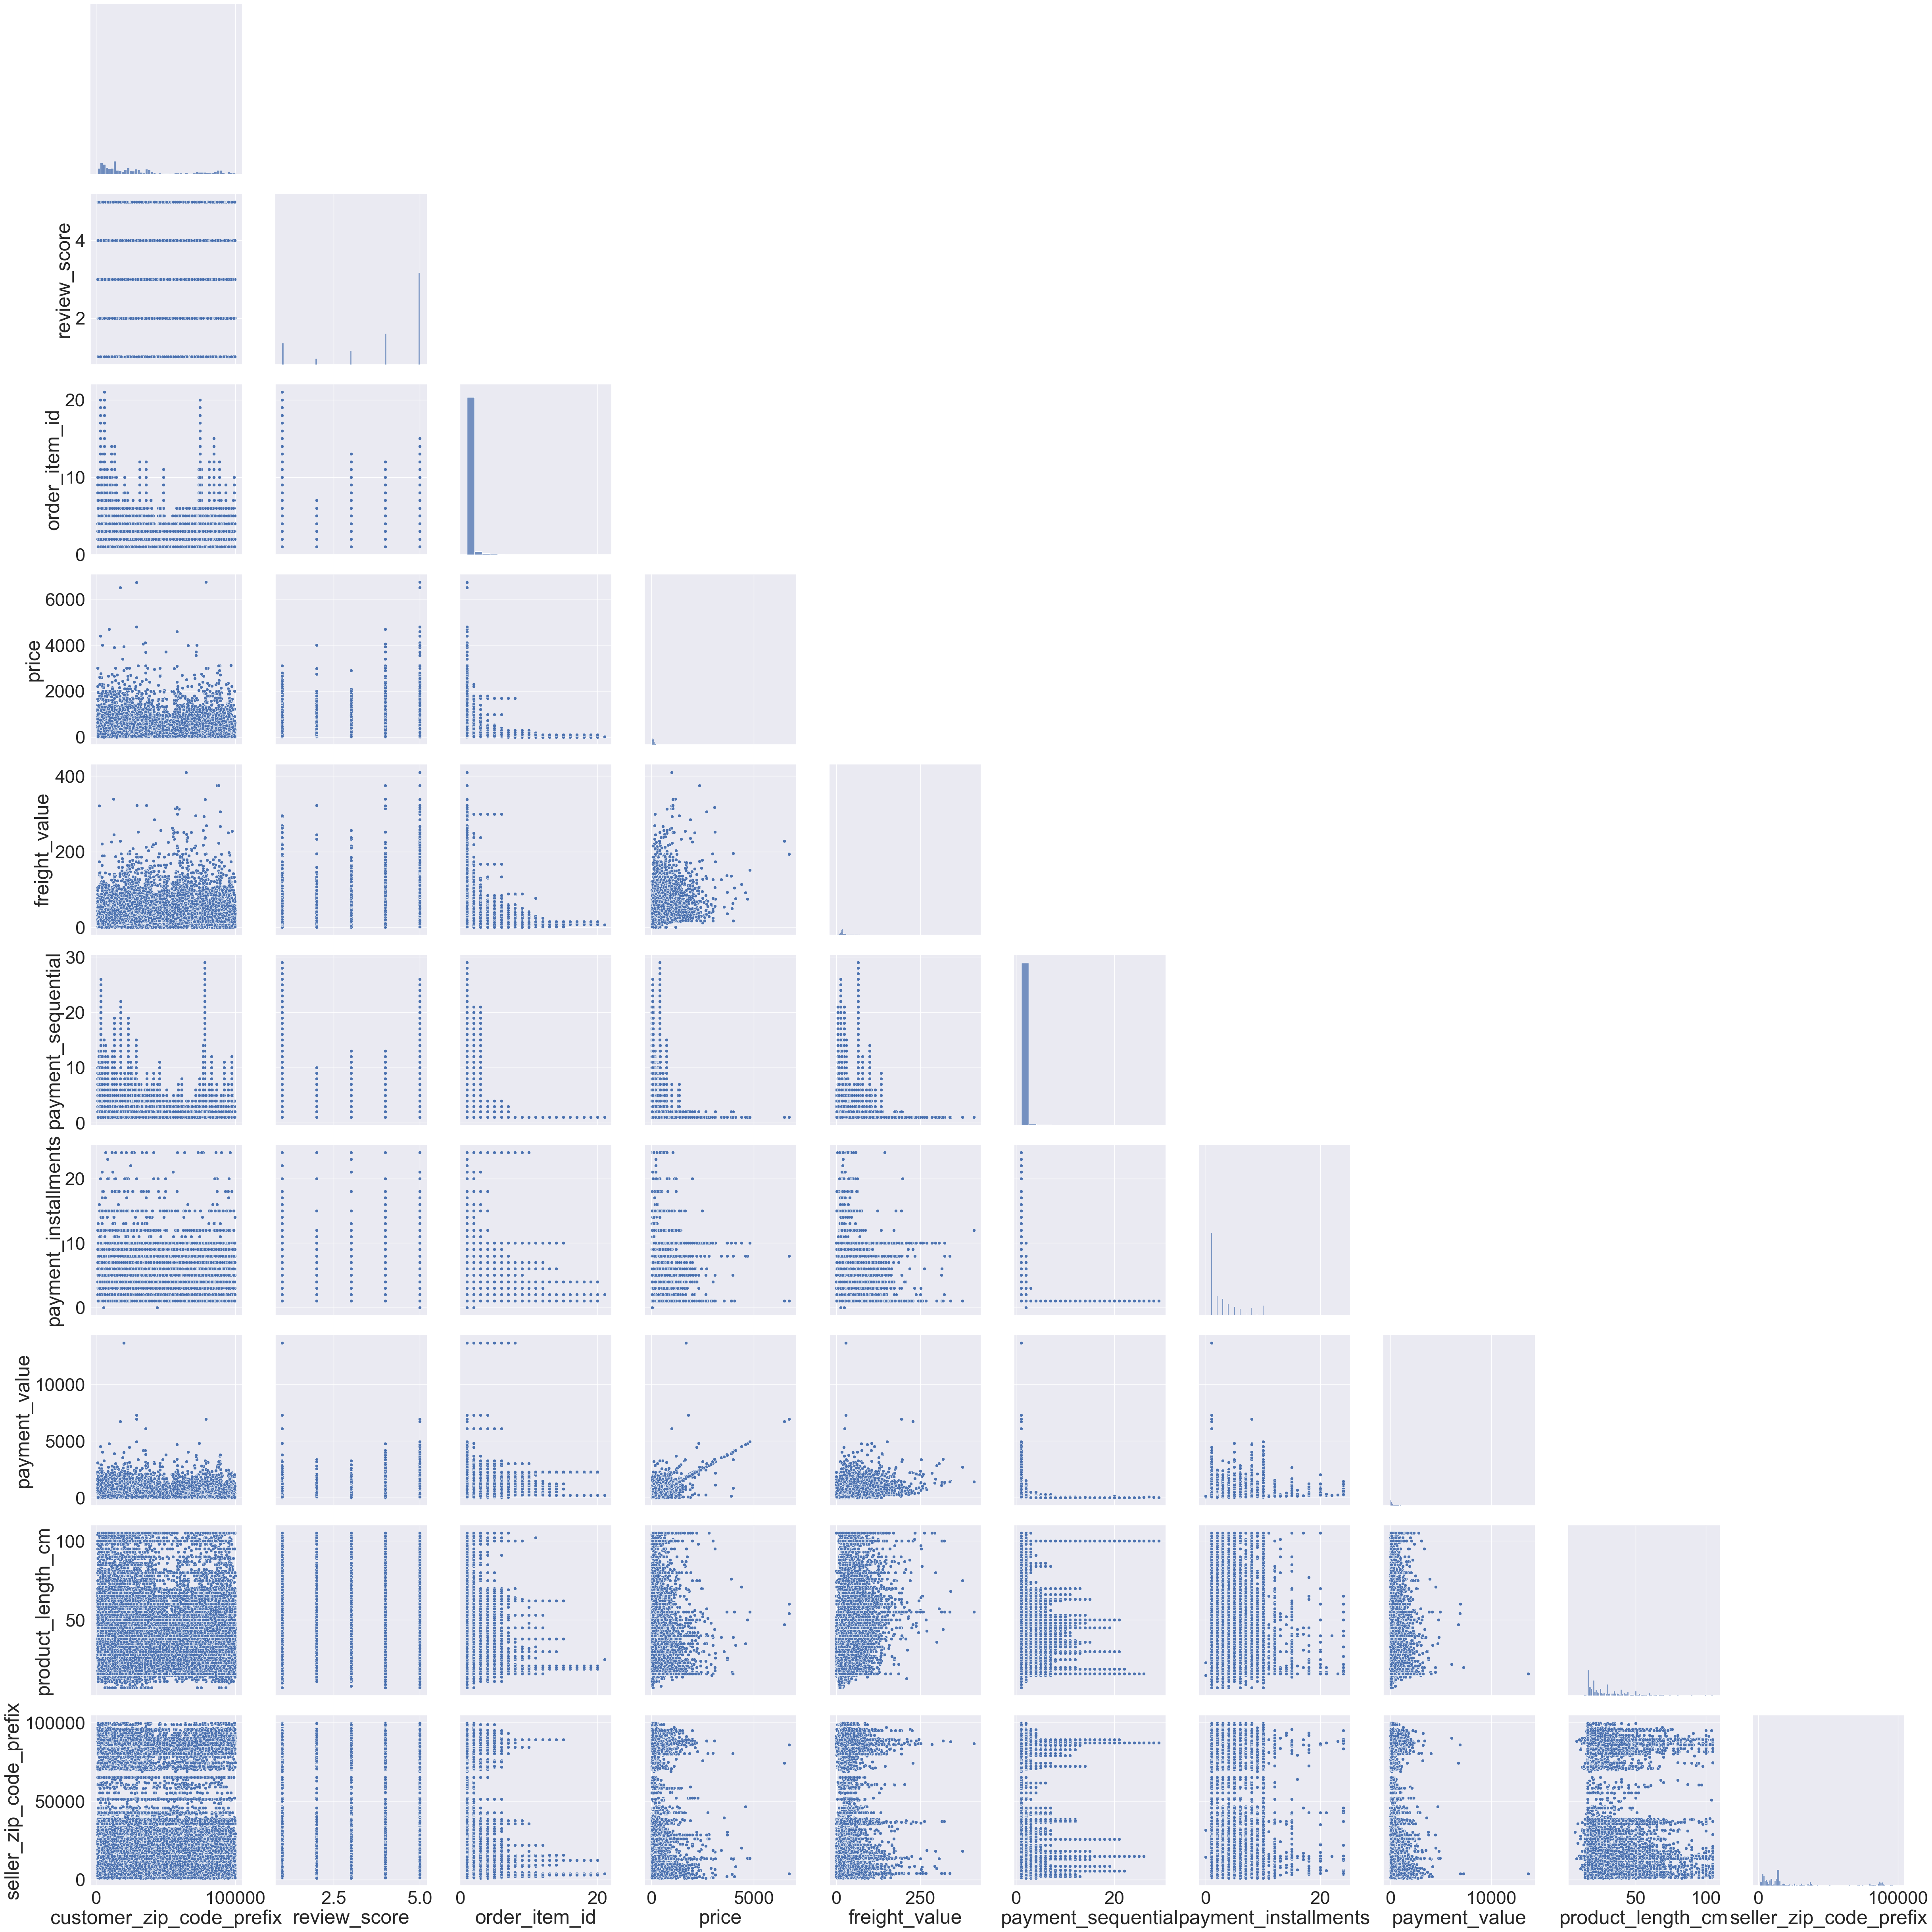

In [93]:
sns.set(font_scale=3)
sns.pairplot(df[colonnes_numeriques],corner=True,height=5)
plt.show()

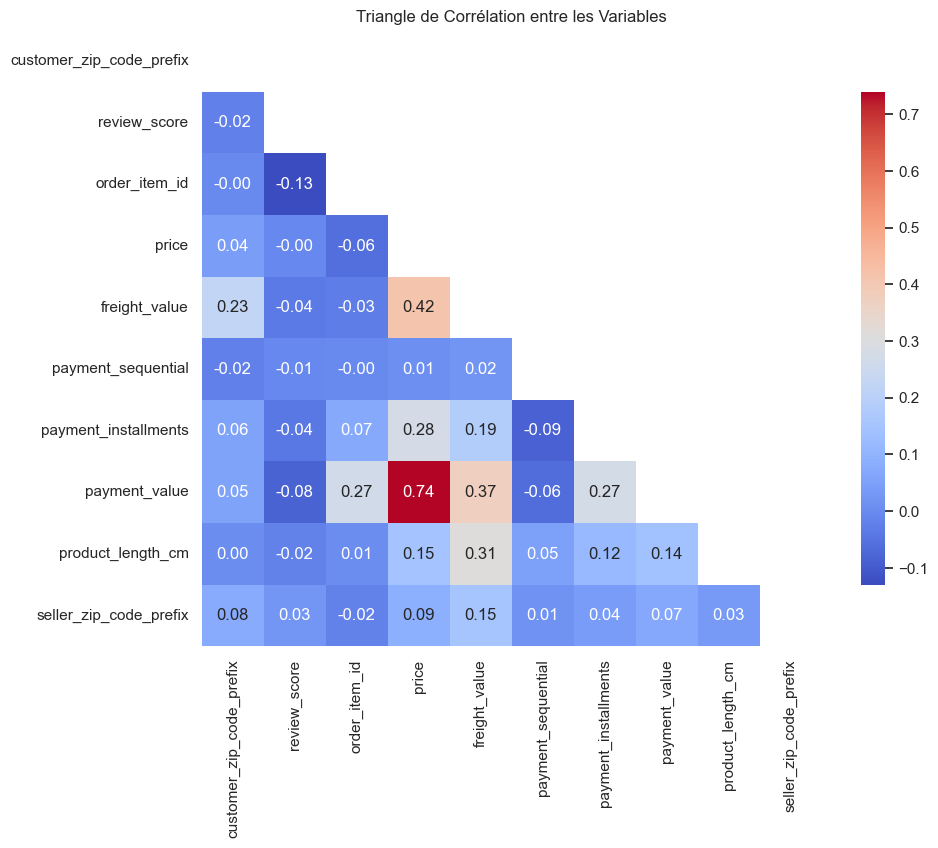

In [94]:
## Matrice de correlation des variables
df[colonnes_numeriques]

# Calcule de la matrice de corrélation
correlation_matrix = df[colonnes_numeriques].corr()

# masque pour la moitié supérieure du triangle de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configuration du le style du tracé
sns.set(style="white")

# figure matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

#le triangle de corrélation avec un dégradé de couleurs
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, cbar_kws={"shrink": 0.8})

#  détails au graphique
plt.title("Triangle de Corrélation entre les Variables")
plt.show()

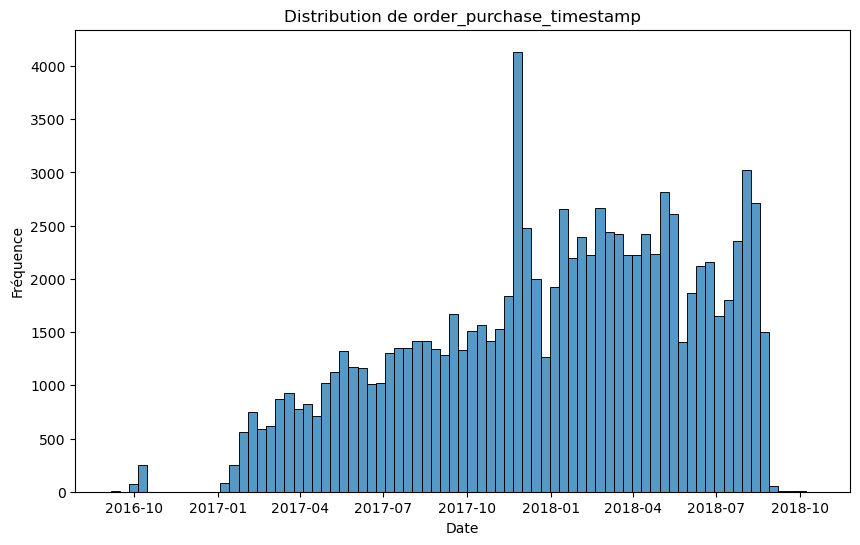

In [84]:
# Visualisation de la répartition de order_purchase_timestamp : 

plt.figure(figsize=(10, 6))
sns.histplot(orders['order_purchase_timestamp'])
plt.xlabel('Date')
plt.ylabel('Fréquence')
plt.title('Distribution de order_purchase_timestamp')
plt.show()

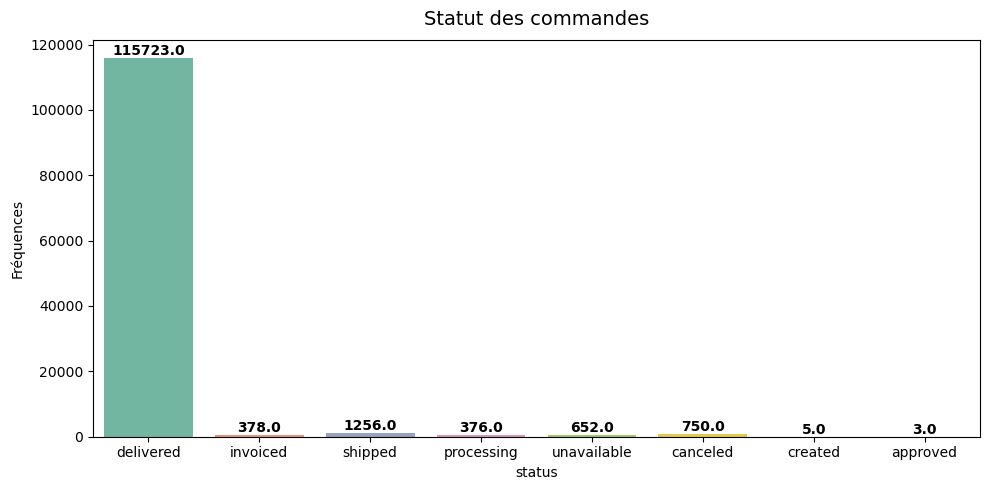

In [85]:
# Status des commandes
plt.figure(figsize=(10, 5))

sns.countplot(x='order_status', data=df, palette='Set2')

# Ajouter des étiquettes pour chaque barre
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.title('Statut des commandes', fontsize=14, pad=10.5)
plt.ylabel('Fréquences')
plt.xlabel('status') 

plt.tight_layout()
plt.show()


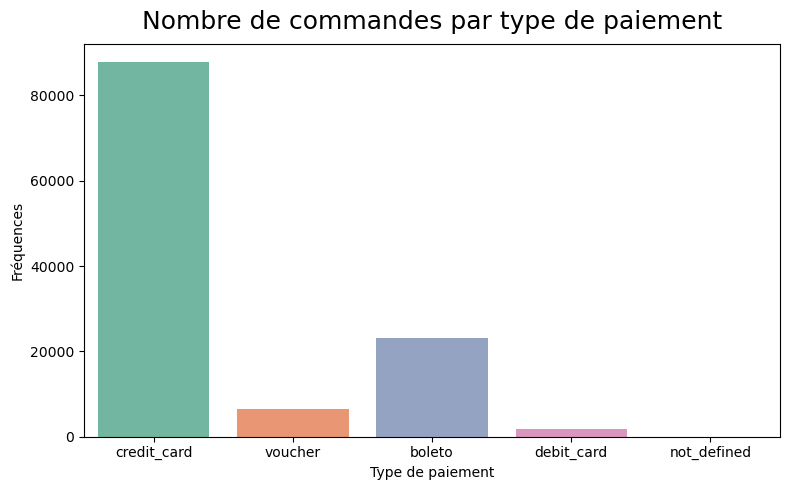

In [86]:
#Type de paiement le plus couramment utilisé
plt.figure(figsize = (8, 5))

sns.countplot(x = 'payment_type', data = df, palette = 'Set2')
plt.title('Nombre de commandes par type de paiement', fontdict = {
    'fontsize': 18}, pad = 10.5)
plt.xlabel('Type de paiement')
plt.ylabel('Fréquences')

plt.tight_layout()

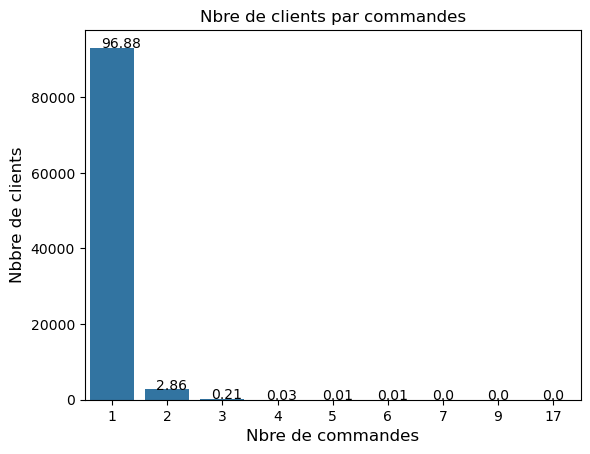

In [87]:
# Répartition du nbre de clients par nbre de commandes
ax = plt.gca()
nbre_client = customers['customer_unique_id'].nunique()
nbre_commande_client = customers.groupby(
    'customer_unique_id').size().value_counts()
df_cmde = pd.DataFrame(
    {'Nbre_commandes': nbre_commande_client.index,
     'Nbre_clients': nbre_commande_client.values})
df_cmde['pourc'] = round(
    (df_cmde['Nbre_clients'])*100/nbre_client, 2)


sns.barplot(x='Nbre_commandes', y='Nbre_clients',
            data=df_cmde, ax=ax)
ax.set_xlabel('Nbre de commandes', fontsize=12)
ax.set_ylabel('Nbbre de clients', fontsize=12)
ax.set_title('Nbre de clients par commandes')
for i, p in enumerate(ax.patches):
    ax.text(
        p.get_width()/4+p.get_x(),
        p.get_height()+p.get_y(),
        df_cmde['pourc'][i]
        )

In [ ]:
# Répartition du nbre de clients par nbre de commandes
ax = plt.gca()
nbre_client2 = df['customer_unique_id'].nunique()
nbre_commande_client2 = df.groupby(
    'customer_unique_id').size().value_counts()
df_cmde = pd.DataFrame(
    {'Nbre_commandes': nbre_commande_client2.index,
     'Nbre_clients': nbre_commande_client2.values})
df_cmde['pourc'] = round(
    (df_cmde['Nbre_clients'])*100/nbre_client2, 2)


sns.barplot(x='Nbre_commandes', y='Nbre_clients',
            data=df_cmde, ax=ax)
ax.set_xlabel('Nbre de commandes', fontsize=12)
ax.set_ylabel('Nbbre de clients', fontsize=12)
ax.set_title('Nbre de clients par commandes')
for i, p in enumerate(ax.patches):
    ax.text(
        p.get_width()/4+p.get_x(),
        p.get_height()+p.get_y(),
        df_cmde['pourc'][i]
        )

In [ ]:
# Nombre de clients par état
clients_par_etat = df.groupby(
    ['customer_id', 'customer_state']).count().reset_index()
sns.countplot(x=clients_par_etat.customer_state, data=clients_par_etat,
              order=clients_par_etat.customer_state.value_counts().index)
plt.title('Nombre de clients par état')
plt.ylabel('Nombre', fontsize=14)
plt.xlabel('Etat', fontsize=14)

plt.show()

In [91]:
df.to_csv(r'C:\Users\imane\Downloads\data_science\projet5\projet5.csv' , index= False)